# MU4MEN01 - Introduction à l'optimisation

# TP n° 3 

### Objectifs 
* Mettre en oeuvre la recherche de minimum par la méthode du gradient à « pas fixe » <br> 
* Mettre en oeuvre la recherche de minimum par la méthode de Newton <br>
* Analyser le comportement et les conditions de convergence de ces méthodes <br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## I / Principe de la méthode du gradient

### Méthode du gradient à pas fixe 


#### Définition du gradient et de la matrice Hessienne


In [2]:
def f(x,y) : 
    return x**2 + 1.5*y**2 - 5*np.sin(2*x+y) + 5*np.sin(x-y)


def Grad(x,y) :
    dF_dx = ( 2*x -10*np.cos(2*x + y) + 5*np.cos(x-y) )
    dF_dy = ( 3*y - 5*np.cos(2*x + y) - 5*np.cos(x-y))
    return [dF_dx , dF_dy]

def Hessian(x,y) : 
    d2f_dxdy = (10*np.sin(2*x + y) + 5*np.sin(x-y) )
    d2F_dx = (2 + 20*np.sin(2*x + y) - 5*np.sin(x-y) )
    d2F_dy = (3 - 5*np.sin(x-y) + 5*np.sin(2*x+y) ) 
    H = [ [d2F_dx , d2f_dxdy] , [d2f_dxdy , d2F_dy ] ]
    return H 


In [3]:
# Algorithme à implanter 
def Grad_a_pas_fixe (X0,alpha,eps,nmax) : 
    
    Xn = X0 ; dX = 1 ; n = 0 
    
    # Stockage des postions x et y pour les tracer sur les isovaleurs 
    global Pos_X , Pos_Y
    Pos_X =[] ; Pos_Y = []
    
    while (dX > eps) and (n < nmax):
        
        Pos_X.append( Xn[0] ) ; Pos_Y.append(Xn[1])
        
        Xn_1 = Xn - np.array(Grad(Xn[0] , Xn[1]))*alpha
        
        dX = np.linalg.norm(Xn_1 - Xn)
        
        Xn = Xn_1
        
        n+= 1
        
        if n == nmax : return False , n , Xn 
    
    
    return True , n , Xn 

# True/False == indicateurs logiques de convergence 
# n == nombre d'iterations 
# Xn == Vectueur des coordonées du minimum de la fonction


### **Etude de l'influence de la position de départ sur l'algorithme et sa solution**

In [4]:
X0 = [0,0] ; alpha = 0.01 ; eps= 10e-5 ; nmax = 99
conv,n,Xn=Grad_a_pas_fixe (X0,alpha,eps,nmax)
print("***Gradient à pas fixe*** \n Convergence de la solution:",conv,"\n Minimum trouvé après ",n," itérations \n Position du minimum:",Xn)

***Gradient à pas fixe*** 
 Convergence de la solution: True 
 Minimum trouvé après  69  itérations 
 Position du minimum: [0.07662854 1.17039818]


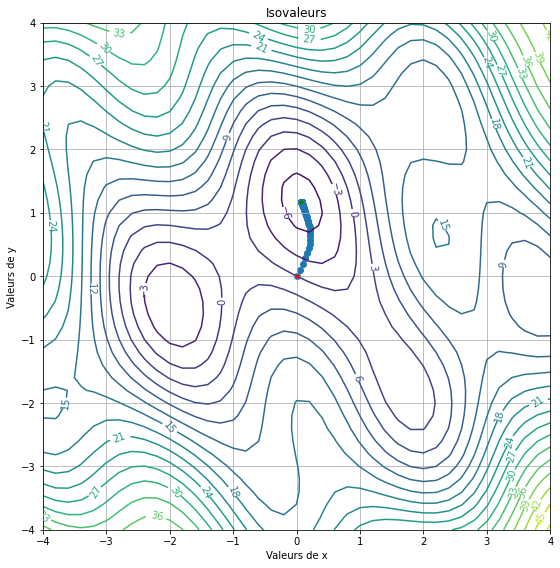

In [5]:
# Affichage des isovaleurs 

""" Tracé pour X0 = [0,0] """

# Définition du domaine de tracé
xmin, xmax, nx = -4, 4, 41
ymin, ymax, ny = -4, 4, 41
# Discrétisation du domaine de tracé
x1d = np.linspace(xmin,xmax,nx)
y1d = np.linspace(ymin,ymax,ny)
x2d, y2d = np.meshgrid(x1d, y1d)

# Tracé des isovaleurs de f1
nIso = 21
plt.figure(figsize=(20, 20))
plt.subplot(121)
cp = plt.contour(x2d,y2d,f(x2d,y2d),nIso)
plt.clabel(cp, inline=True,fontsize=10) # Valeur des Isolvaleurs 
plt.title('Isovaleurs')
plt.xlabel('Valeurs de x')
plt.ylabel('Valeurs de y')
plt.grid()
plt.axis('square')

Pos = [Pos_X ,Pos_Y]
plt.scatter(Pos[0],Pos[1])
# plt.plot(Pos[0],Pos[1], '.r-')

plt.plot(Pos[0][0],Pos[1][0],'.r') # Départ
plt.plot(Pos[0][-1],Pos[1][-1],'.g') # Arrivée 
plt.show()


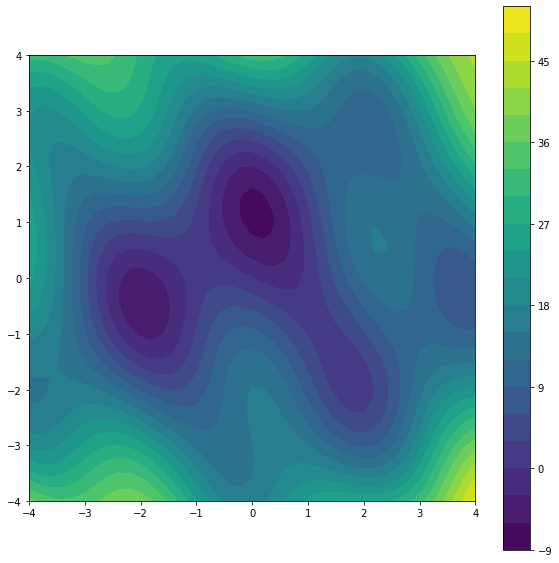

In [6]:
plt.figure(figsize=(10, 10))
plt.contourf(x2d,y2d,f(x2d,y2d),nIso)
plt.axis('square')
plt.colorbar()

In [7]:
""" Départ de [-2,2] """

X0 = [-2,-2] ; alpha = 0.01 ; eps= 10e-5 ; nmax = 70
conv,n,Xn=Grad_a_pas_fixe (X0,alpha,eps,nmax)
print("***Gradient à pas fixe*** \n Convergence de la solution:",conv,"\n Minimum trouvé après ",n," itérations \n Position du minimum:",Xn)

***Gradient à pas fixe*** 
 Convergence de la solution: True 
 Minimum trouvé après  65  itérations 
 Position du minimum: [-1.94874857 -0.45651098]


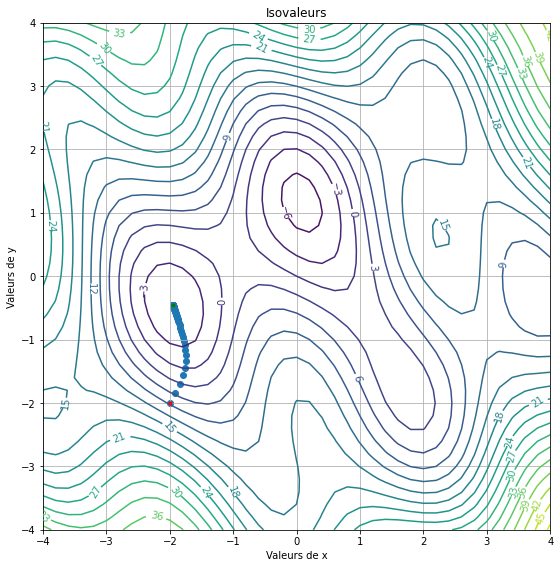

In [8]:
# Définition du domaine de tracé
xmin, xmax, nx = -4, 4, 41
ymin, ymax, ny = -4, 4, 41
# Discrétisation du domaine de tracé
x1d = np.linspace(xmin,xmax,nx)
y1d = np.linspace(ymin,ymax,ny)
x2d, y2d = np.meshgrid(x1d, y1d)

# Tracé des isovaleurs de f1
nIso = 21
plt.figure(figsize=(20, 20))
plt.subplot(121)
cp = plt.contour(x2d,y2d,f(x2d,y2d),nIso)
plt.title('Isovaleurs')
plt.xlabel('Valeurs de x')
plt.ylabel('Valeurs de y')
plt.grid()
plt.clabel(cp, inline=True,fontsize=10) # Isolvaleurs 
plt.axis('square')

Pos = [Pos_X ,Pos_Y]
plt.scatter(Pos[0],Pos[1])
# plt.plot(Pos[0],Pos[1], '.r-')

plt.plot(Pos[0][0],Pos[1][0],'.r') # Arrivée 
plt.plot(Pos[0][-1],Pos[1][-1],'.g') # Départ 
plt.show()


### **Etude de l'influence de alpha sur l'algorithme et sa solution**

In [9]:
X0 = [-2,-2] ; eps= 10e-5 ; nmax = 200

alpha = 0.01
conv,n,Xn=Grad_a_pas_fixe (X0,alpha,eps,nmax)
print("***Gradient à pas fixe (alpha=",alpha,")*** \n Convergence de la solution:",conv,"\n Minimum trouvé après ",n," itérations \n Position du minimum:",Xn,"\n")

alpha = 0.05
conv,n,Xn=Grad_a_pas_fixe (X0,alpha,eps,nmax)
print("***Gradient à pas fixe (alpha=",alpha,")*** \n Convergence de la solution:",conv,"\n Minimum trouvé après ",n," itérations \n Position du minimum:",Xn,"\n")

alpha = 0.072
conv,n,Xn=Grad_a_pas_fixe (X0,alpha,eps,nmax)
print("***Gradient à pas fixe (alpha=",alpha,")*** \n Convergence de la solution:",conv,"\n Minimum trouvé après ",n," itérations \n Position du minimum:",Xn,"\n")

alpha = 0.073
conv,n,Xn=Grad_a_pas_fixe (X0,alpha,eps,nmax)
print("***Gradient à pas fixe (alpha=",alpha,")*** \n Convergence de la solution:",conv,"\n Minimum trouvé après ",n," itérations \n Position du minimum:",Xn,"\n")

alpha = 0.08
conv,n,Xn=Grad_a_pas_fixe (X0,alpha,eps,nmax)
print("***Gradient à pas fixe (alpha=",alpha,")*** \n Convergence de la solution:",conv,"\n Minimum trouvé après ",n," itérations \n Position du minimum:",Xn,"\n")

alpha = 0.1
conv,n,Xn=Grad_a_pas_fixe (X0,alpha,eps,nmax)
print("***Gradient à pas fixe (alpha=",alpha,")*** \n Convergence de la solution:",conv,"\n Minimum trouvé après ",n," itérations \n Position du minimum:",Xn,"\n")

alpha = 0.2
conv,n,Xn=Grad_a_pas_fixe (X0,alpha,eps,nmax)
print("***Gradient à pas fixe (alpha=",alpha,")*** \n Convergence de la solution:",conv,"\n Minimum trouvé après ",n," itérations \n Position du minimum:",Xn,"\n")

***Gradient à pas fixe (alpha= 0.01 )*** 
 Convergence de la solution: True 
 Minimum trouvé après  65  itérations 
 Position du minimum: [-1.94874857 -0.45651098] 

***Gradient à pas fixe (alpha= 0.05 )*** 
 Convergence de la solution: True 
 Minimum trouvé après  13  itérations 
 Position du minimum: [-1.94895252 -0.45584044] 

***Gradient à pas fixe (alpha= 0.072 )*** 
 Convergence de la solution: True 
 Minimum trouvé après  149  itérations 
 Position du minimum: [-1.94892181 -0.45577976] 

***Gradient à pas fixe (alpha= 0.073 )*** 
 Convergence de la solution: False 
 Minimum trouvé après  200  itérations 
 Position du minimum: [-1.94954311 -0.45596891] 

***Gradient à pas fixe (alpha= 0.08 )*** 
 Convergence de la solution: False 
 Minimum trouvé après  200  itérations 
 Position du minimum: [-2.19025384 -0.51020453] 

***Gradient à pas fixe (alpha= 0.1 )*** 
 Convergence de la solution: False 
 Minimum trouvé après  200  itérations 
 Position du minimum: [-2.37527321 -0.5388967 

##### On remarque une influence de alpha sur la rapidité de convergence de la solution pour trouver un minimum. Cette influence semble dépendre tres fortement de l'intensité du gradient donc par consequent de la géometrie du terrain. Ce qui signifie que l'efficacité lié au alpha dépend fortement de la valeur du gradient à l'instant t. 
##### Concernant alpha , on remarque que l'algorithme commence à diverger pour une valeur de alpha supérieure ou égale à 0.073. On note aussi qu'une valeur de alpha trop petite viendra faire diverger l'algorithme.
##### Pour contrer cela , on implemente dans la fonction un mécanisme ajustant la valeur de alpha afin d'assurer la condition suivant J(Xn+1) < J(xn) qui garanti la convergence de l'algorithme.

In [10]:
  def Grad_a_pas_Adaptatif (X0,alpha,eps,nmax) : 
    
    Xn = X0 ; dX = 1 ; n = 0 
    
    # Stockage des postions x et y pour les tracer sur les isovaleurs 
    global Pos_X , Pos_Y
    Pos_X =[] ; Pos_Y = [] ;   Xn_1 = Xn - np.array(Grad(Xn[0] , Xn[1]))*alpha
    Pos_X.append( Xn[0] ) ; Pos_Y.append(Xn[1])
    
    while (dX > eps) and (n < nmax):
        
        while f(Xn_1[0],Xn_1[1]) >= f(Xn[0],Xn[1]): # Ajustement 
            alpha=alpha*0.99
            Xn_1 = Xn - (np.array(Grad(Xn[0] , Xn[1])))*alpha
        
        Pos_X.append( Xn[0] ) ; Pos_Y.append(Xn[1])
        
        Xn_1 = Xn - (np.array(Grad(Xn[0] , Xn[1])))*alpha
        
        dX = np.linalg.norm(Xn_1 - Xn)
        
        #print('Iteration',n,'/ alpha =',alpha,'/ dX =',dX)

        Xn = Xn_1
        
        n+= 1
        
        if n == nmax : return False , n , Xn 
    
    
    return True , n , Xn 

### **Comparons maintenant la methode du gradient à pas fixe et la méthode du gradient à pas adaptatif**

In [11]:
X0 = [-2,1] ; eps= 1e-5 ; nmax = 300

alpha = 1e-2
print("alpha =",alpha)
conv,n,Xn=Grad_a_pas_fixe (X0,alpha,eps,nmax)
conv2,n2,Xn2=Grad_a_pas_Adaptatif (X0,alpha,eps,nmax)
print("***Gradient à pas fixe*** \n Convergence de la solution:",conv,"\n Minimum trouvé après ",n," itérations \n Position du minimum:",Xn)
print("\n *** Gradient à pas adaptatif*** \n Convergence de la solution:",conv2,"\n Minimum trouvé après ",n2," itérations \n Position du minimum:",Xn2,"\n")

alpha = 0.070
print("alpha =",alpha)
conv,n,Xn=Grad_a_pas_fixe (X0,alpha,eps,nmax)
conv2,n2,Xn2=Grad_a_pas_Adaptatif (X0,alpha,eps,nmax)
print("***Gradient à pas fixe*** \n Convergence de la solution:",conv,"\n Minimum trouvé après ",n," itérations \n Position du minimum:",Xn)
print("\n *** Gradient à pas adaptatif*** \n Convergence de la solution:",conv2,"\n Minimum trouvé après ",n2," itérations \n Position du minimum:",Xn2,"\n")

alpha = 1e-1
print("alpha =",alpha)
conv,n,Xn=Grad_a_pas_fixe (X0,alpha,eps,nmax)
conv2,n2,Xn2=Grad_a_pas_Adaptatif (X0,alpha,eps,nmax)
print("***Gradient à pas fixe*** \n Convergence de la solution:",conv,"\n Minimum trouvé après ",n," itérations \n Position du minimum:",Xn)
print("\n *** Gradient à pas adaptatif*** \n Convergence de la solution:",conv2,"\n Minimum trouvé après ",n2," itérations \n Position du minimum:",Xn2,"\n")

alpha = 1.5
print("alpha =",alpha)
conv,n,Xn=Grad_a_pas_fixe (X0,alpha,eps,nmax)
conv2,n2,Xn2=Grad_a_pas_Adaptatif (X0,alpha,eps,nmax)
print("***Gradient à pas fixe*** \n Convergence de la solution:",conv,"\n Minimum trouvé après ",n," itérations \n Position du minimum:",Xn)
print("\n *** Gradient à pas adaptatif*** \n Convergence de la solution:",conv2,"\n Minimum trouvé après ",n2," itérations \n Position du minimum:",Xn2,"\n")


alpha = 0.01
***Gradient à pas fixe*** 
 Convergence de la solution: True 
 Minimum trouvé après  83  itérations 
 Position du minimum: [-1.94898932 -0.45572054]

 *** Gradient à pas adaptatif*** 
 Convergence de la solution: True 
 Minimum trouvé après  130  itérations 
 Position du minimum: [-1.94905739 -0.45549698] 

alpha = 0.07
***Gradient à pas fixe*** 
 Convergence de la solution: True 
 Minimum trouvé après  81  itérations 
 Position du minimum: [-1.94896292 -0.45579228]

 *** Gradient à pas adaptatif*** 
 Convergence de la solution: True 
 Minimum trouvé après  25  itérations 
 Position du minimum: [-1.94896523 -0.45579298] 

alpha = 0.1
***Gradient à pas fixe*** 
 Convergence de la solution: False 
 Minimum trouvé après  300  itérations 
 Position du minimum: [-1.42184968 -0.30516999]

 *** Gradient à pas adaptatif*** 
 Convergence de la solution: True 
 Minimum trouvé après  33  itérations 
 Position du minimum: [-1.94896854 -0.45579399] 

alpha = 1.5
***Gradient à pas fixe*

#### On constate que le Gradient à pas fixe converge plus rapidement vers la solution que le Gradient à pas adaptatif si le alpha est petit. En revanche on voit que lorsque le alpha devient grand, le Gradient à pas fixe converge plus lentement que l'autre méthode et il diverge à partir de alpha = 0.072 (déterminé précédemment). Le Gradient à pas adaptatif peut supporter un alpha ayant une grande valeur car ce alpha est uniquement le alpha de départ. Par consequent ce alpha est vite adapté pour avoir une valeur optimale ce qui permet d'avoir un algorithme très stable malgré des "conditions (parametres de départ + changement de gradient" complexes.

## II / Implanter la méthode de Newton

### Algorithme de Newton 

In [12]:
def Methode_De_Newton (X0n, eps_n , kmax)  :  #indice n pour newton 
    Xn_n = X0n ; dX_n = 1 ; k = 0 
    
    while dX_n > eps_n and k < kmax : 
        H = Hessian(Xn_n[0] , Xn_n[1])
       
        H_inv = np.linalg.inv(H)
        Gradient = np.array( Grad (Xn_n[0] , Xn_n[1]) )
        
        Delta_X = - np.dot(H_inv,Gradient)
        
        Xn_n += Delta_X 
        dX_n =  np.linalg.norm(Delta_X)
        k+=1
    
    return True , k , Xn_n 

# True/False == indicateurs logiques de convergence 
# k == nombre d'iterations 
# Xn_n == Vectueur des coordonées du minimum de la fonction de Newton 


### **Etude de l'influence du point de départ sur la solution et la convergence de l'algorithme.**

In [13]:
eps_n = 1e-5 ; kmax = 200

X0n = [0,0]
conv,n,Xn=Methode_De_Newton(X0n, eps_n , kmax)
print("***Newton*** \n Convergence de la solution:",conv,"\n Minimum trouvé après ",n," itérations \n Position du minimum:",Xn,"\n")

X0n = [0,1]
conv,n,Xn=Methode_De_Newton(X0n, eps_n , kmax)
print("***Newton*** \n Convergence de la solution:",conv,"\n Minimum trouvé après ",n," itérations \n Position du minimum:",Xn,"\n")

X0n = [3,-3]
conv,n,Xn=Methode_De_Newton(X0n, eps_n , kmax)
print("***Newton*** \n Convergence de la solution:",conv,"\n Minimum trouvé après ",n," itérations \n Position du minimum:",Xn,"\n")

X0n = [-4,4]
conv,n,Xn=Methode_De_Newton(X0n, eps_n , kmax)
print("***Newton*** \n Convergence de la solution:",conv,"\n Minimum trouvé après ",n," itérations \n Position du minimum:",Xn,"\n")

X0n = [2,1]
conv,n,Xn=Methode_De_Newton(X0n, eps_n , kmax)
print("***Newton*** \n Convergence de la solution:",conv,"\n Minimum trouvé après ",n," itérations \n Position du minimum:",Xn,"\n")

X0n = [1,1]
conv,n,Xn=Methode_De_Newton(X0n, eps_n , kmax)
print("***Newton*** \n Convergence de la solution:",conv,"\n Minimum trouvé après ",n," itérations \n Position du minimum:",Xn,"\n")

X0n = [-0.5,2.5]
conv,n,Xn=Methode_De_Newton(X0n, eps_n , kmax)
print("***Newton*** \n Convergence de la solution:",conv,"\n Minimum trouvé après ",n," itérations \n Position du minimum:",Xn,"\n")

X0n = [-3,0]
conv,n,Xn=Methode_De_Newton(X0n, eps_n , kmax)
print("***Newton*** \n Convergence de la solution:",conv,"\n Minimum trouvé après ",n," itérations \n Position du minimum:",Xn,"\n")

***Newton*** 
 Convergence de la solution: True 
 Minimum trouvé après  5  itérations 
 Position du minimum: [2.08679615 2.71633965] 

***Newton*** 
 Convergence de la solution: True 
 Minimum trouvé après  4  itérations 
 Position du minimum: [0.07637822 1.17112912] 

***Newton*** 
 Convergence de la solution: True 
 Minimum trouvé après  200  itérations 
 Position du minimum: [ 9.48317045e+12 -1.14632882e+13] 

***Newton*** 
 Convergence de la solution: True 
 Minimum trouvé après  24  itérations 
 Position du minimum: [-1.94896709 -0.45579355] 

***Newton*** 
 Convergence de la solution: True 
 Minimum trouvé après  4  itérations 
 Position du minimum: [2.25702376 0.64212774] 

***Newton*** 
 Convergence de la solution: True 
 Minimum trouvé après  200  itérations 
 Position du minimum: [1.13326972e+08 2.47921720e+07] 

***Newton*** 
 Convergence de la solution: True 
 Minimum trouvé après  5  itérations 
 Position du minimum: [ 1.23235144 -0.88184983] 

***Newton*** 
 Convergence d

#### Le point de départ influe enormement sur la valeur d'arrivée
#### Si le point de départ est mal choisi on peut avoir une solution qui diverge vers des valeurs surréaliste.
#### Néanmoins lorsque la méthode converge on constate que la convergence est très très rapide. Bien plus que les autres méthodes testées précédemment.

## III / Methode du gradient + Newton 

In [14]:

def Grad_Newton(X0,alpha,eps,nmax) : 
    Converge , iterations , X0n =  Grad_a_pas_fixe(X0,alpha,eps,nmax)
    eps_n=eps
    kmax=nmax
    # On réutilisera la valeur de convergence de la methode du gradient comme point de départ pour Newton 
    conv,n,Xn=Methode_De_Newton(X0n, eps_n , kmax)
    return conv,iterations,n,Xn

X0 = [-2,4] ; alpha = 1e-2 ; eps= 1e-6 ; nmax = 300
conv,iterations,n,Xn=Grad_Newton(X0,alpha,eps,nmax)

print("***Grad_Newton*** \n Convergence de la solution:",conv,"\n Minimum trouvé après ",iterations," itérations de la méthode du gradient à pas fixe et ",n," itérations de la méthode de Newton \n Position du minimum:",Xn)


***Grad_Newton*** 
 Convergence de la solution: True 
 Minimum trouvé après  128  itérations de la méthode du gradient à pas fixe et  2  itérations de la méthode de Newton 
 Position du minimum: [0.07637822 1.17112912]


#### Les deux méthodes combinées offrent une résolution beacoup plus rapide et précise de la recherche du mimimum de la fonction.
#### La méthode du Gradient à pas fixe permet de converger rapidement vers une postion proche du minimum et la méthode de Newton permet d'atteindre la position précise du minimum. 
#### On aurait pu remplacer la méthode du Gradient à pas fixe par une méthode du Gradient à pas adaptatif afin de garentir que l'algorithme ne diverge pas, peu importe le alpha, mais dans ce cas nous perdrions un peu en rapidité.